In [0]:
keys = spark.read.csv('/FileStore/tables/Shruti_project_accessKeys.csv', inferSchema=True, header=True)
Access_Id = keys.first()[0]
Secret_Id = keys.first()[1]

access_key = Access_Id
secret_key = Secret_Id
sc._jsc.hadoopConfiguration().set("fs.s3a.access.key", access_key)
sc._jsc.hadoopConfiguration().set("fs.s3a.secret.key", secret_key)

aws_region = "ap-south-1"
sc._jsc.hadoopConfiguration().set("fs.s3a.endpoint", "s3." + aws_region + ".amazonaws.com")

In [0]:
from pyspark.sql.functions import col
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, TimestampType

schema = StructType([
    StructField('InvoiceNo', IntegerType(), True),
    StructField('StockCode', StringType(), True),
    StructField('Description', StringType(), True),
    StructField('Quantity', IntegerType(), True),
    StructField('InvoiceDate', StringType(), True),
    StructField('UnitPrice', DoubleType(), True),
    StructField('CustomerID', StringType(), True),
    StructField('Country', StringType(), True),
])

In [0]:
df = spark.read.csv('s3://dbda-project/augmented_dataset.csv', inferSchema=True , header=True)
print(df.count(), len(df.columns))
df.show(5)

10000000 9
+---+---------+---------+--------------------+------------------+------------+------------------+------------------+--------------+
|_c0|InvoiceNo|StockCode|         Description|          Quantity| InvoiceDate|         UnitPrice|        CustomerID|       Country|
+---+---------+---------+--------------------+------------------+------------+------------------+------------------+--------------+
|  0|   536365|   85123A|WHITE HANGING HEA...| 9.540195124753016|1/12/10 8:26| 4.046632237476933|17847.175914292013|United Kingdom|
|  1|   536365|    71053| WHITE METAL LANTERN| 4.673553105780806|1/12/10 8:26| 4.765596152307104| 17876.63145571205|United Kingdom|
|  2|   536365|   84406B|CREAM CUPID HEART...| 6.727697829123555|1/12/10 8:26| 2.027311506960725|17843.254906730202|United Kingdom|
|  3|   536365|   84029G|KNITTED UNION FLA...|3.8580927863913663|1/12/10 8:26|3.6076956140842515| 17839.88311992239|United Kingdom|
|  4|   536365|   84029E|RED WOOLLY HOTTIE...| 3.748603158010393|

# EDA (Exploratory Data Analysis)

In [0]:
import pandas as pd

In [0]:
pdf = df.toPandas()
pdf.head()

,_c0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,9.540195,1/12/10 8:26,4.046632,17847.175914,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,4.673553,1/12/10 8:26,4.765596,17876.631456,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,6.727698,1/12/10 8:26,2.027312,17843.254907,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.858093,1/12/10 8:26,3.607696,17839.883120,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.748603,1/12/10 8:26,3.078331,17872.587637,United Kingdom


In [0]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   _c0          int32  
 1   InvoiceNo    object 
 2   StockCode    object 
 3   Description  object 
 4   Quantity     float64
 5   InvoiceDate  object 
 6   UnitPrice    float64
 7   CustomerID   float64
 8   Country      object 
dtypes: float64(3), int32(1), object(5)
memory usage: 648.5+ MB


In [0]:
pdf.tail()

,_c0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9999995,9999995,549953,20724,RED RETROSPOT CHARLOTTE BAG,11.819310,4/13/2011 13:15,-0.848686,12773.183642,Portugal
9999996,9999996,569374,46776D,WOVEN SUNSET CUSHION COVER,4.356914,3/10/11 16:14,3.929372,NaN,United Kingdom
9999997,9999997,552869,22620,4 TRADITIONAL SPINNING TOPS,13.875513,12/5/11 8:41,0.020747,15135.405590,United Kingdom
9999998,9999998,576654,85014B,RED RETROSPOT UMBRELLA,3.792852,11/16/2011 10:55,6.962216,15595.531584,United Kingdom
9999999,9999999,566400,22581,WOOD STOCKING CHRISTMAS SCANDISPOT,14.191953,12/9/11 13:16,0.425229,17103.754752,United Kingdom


In [0]:
pdf.sample(10)

,_c0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5504957,5504957,543530,22327,ROUND SNACK BOXES SET OF 4 SKULLS,0.558211,9/2/11 12:46,5.343690,NaN,United Kingdom
6298476,6298476,566446,23339,EGG FRYING PAN BLUE,0.114472,12/9/11 15:40,5.961231,NaN,United Kingdom
5805185,5805185,570225,23081,GREEN METAL BOX ARMY SUPPLIES,0.310520,9/10/11 13:15,7.196661,16596.716634,United Kingdom
9354664,9354664,548560,21535,RED RETROSPOT SMALL MILK JUG,1.200992,1/4/11 10:10,2.244211,13473.787091,United Kingdom
7449599,7449599,571691,23082,SET 6 PAPER TABLE LANTERN HEARTS,6.260969,10/18/2011 14:34,4.365718,13877.268251,United Kingdom
1945911,1945911,564972,23375,50'S CHRISTMAS PAPER GIFT BAG,10.785281,8/31/2011 15:30,1.349141,12634.767995,Germany
2239732,2239732,542231,22720,SET OF 3 CAKE TINS PANTRY DESIGN,7.510238,1/26/2011 13:40,5.686568,16709.793601,United Kingdom
4132211,4132211,C566565,CRUK,CRUK Commission,-1.974589,9/13/2011 12:32,53.005802,14103.676582,United Kingdom
676467,676467,C547853,21041,RED RETROSPOT OVEN GLOVE DOUBLE,-5.024181,3/27/2011 12:11,3.074009,15581.801228,United Kingdom
8977624,8977624,563903,21975,PACK OF 60 DINOSAUR CAKE CASES,4.306469,8/21/2011 11:15,0.779298,17058.763054,United Kingdom


In [0]:
# Keep only United Kingdom data
uk_data = df.filter(col('Country') == 'United Kingdom')
print(uk_data.count(), len(uk_data.columns))
uk_data.show(5)

9143402 9
+---+---------+---------+--------------------+------------------+------------+------------------+------------------+--------------+
|_c0|InvoiceNo|StockCode|         Description|          Quantity| InvoiceDate|         UnitPrice|        CustomerID|       Country|
+---+---------+---------+--------------------+------------------+------------+------------------+------------------+--------------+
|  0|   536365|   85123A|WHITE HANGING HEA...| 9.540195124753016|1/12/10 8:26| 4.046632237476933|17847.175914292013|United Kingdom|
|  1|   536365|    71053| WHITE METAL LANTERN| 4.673553105780806|1/12/10 8:26| 4.765596152307104| 17876.63145571205|United Kingdom|
|  2|   536365|   84406B|CREAM CUPID HEART...| 6.727697829123555|1/12/10 8:26| 2.027311506960725|17843.254906730202|United Kingdom|
|  3|   536365|   84029G|KNITTED UNION FLA...|3.8580927863913663|1/12/10 8:26|3.6076956140842515| 17839.88311992239|United Kingdom|
|  4|   536365|   84029E|RED WOOLLY HOTTIE...| 3.748603158010393|1

In [0]:
# Remove rows with missing CustomerID
uk_data = uk_data.filter(col('CustomerID').isNotNull())
print(uk_data.count(), len(uk_data.columns))

6677776 9


In [0]:
# Filter out records with Positive values
uk_data = uk_data.filter(col('Quantity') > 0)
print(uk_data.count(), len(uk_data.columns))

5892549 9


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_timestamp, coalesce, col

# Initialize Spark session and set legacy time parser policy
spark = SparkSession.builder.appName("DateParser").getOrCreate()
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

# Define all date formats
formats = [
    "MM/dd/yyyy HH:mm",
    "MM-dd-yyyy HH:mm",
    "yyyy-MM-dd HH:mm",
    "yyyy/MM/dd HH:mm",
    "MM/dd/yy HH:mm",
    "MM-dd-yy HH:mm",
    "yy/MM/dd HH:mm",
    "yy-MM-dd HH:mm",
    "MM/dd/yyyy h:mm a",
    "MM-dd-yyyy h:mm a",
    "yyyy-MM-dd h:mm a",
    "yyyy/MM/dd h:mm a",
    "MM/dd/yy h:mm a",
    "MM-dd-yy h:mm a",
    "MM/dd/yyyy",
    "MM-dd-yyyy",
    "yyyy/MM/dd",
    "yyyy-MM-dd",
    "MM/dd/yy",
    "MM-dd-yy",
    "yy/MM/dd",
    "yy-MM-dd",
    "MM/dd/yyyy HH:mm:ss.SSS",
    "yyyy-MM-dd HH:mm:ss.SSS",
    "yyyy-MM-dd'T'HH:mm:ssXXX",
    "yyyy-MM-dd'T'HH:mm:ss.SSSXXX",
    "yyyy-MM-dd'T'HH:mm:ss.SSS'Z'",
    "MM/dd/yyyy h:mm",
    "MM-dd-yyyy h:mm",
    "yyyy-MM-dd h:mm"
]

# Convert to timestamp using coalesce and all formats
df = df.withColumn(
    "date_parsed",
    coalesce(*[to_timestamp(col('InvoiceDate'), fmt) for fmt in formats])
)

df.show(truncate=False)


+---+---------+---------+-----------------------------------+------------------+------------+------------------+------------------+--------------+-------------------+
|_c0|InvoiceNo|StockCode|Description                        |Quantity          |InvoiceDate |UnitPrice         |CustomerID        |Country       |date_parsed        |
+---+---------+---------+-----------------------------------+------------------+------------+------------------+------------------+--------------+-------------------+
|0  |536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |9.540195124753016 |1/12/10 8:26|4.046632237476933 |17847.175914292013|United Kingdom|0010-01-12 08:26:00|
|1  |536365   |71053    |WHITE METAL LANTERN                |4.673553105780806 |1/12/10 8:26|4.765596152307104 |17876.63145571205 |United Kingdom|0010-01-12 08:26:00|
|2  |536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |6.727697829123555 |1/12/10 8:26|2.027311506960725 |17843.254906730202|United Kingdom|0010-01-12 08:26:00

In [0]:
# Add new column depicting total amount
uk_data = uk_data.withColumn("TotalAmount", col("Quantity") * col("UnitPrice"))

In [0]:
uk_data.count(), len(uk_data.columns)

Out[16]: (5892549, 10)

In [0]:
from pyspark.sql.functions import col, count, when
null_counts = uk_data.select([count(when(col(c).isNull(), c)).alias(c) for c in uk_data.columns])
null_counts.show()

+---+---------+---------+-----------+--------+-----------+---------+----------+-------+-----------+
|_c0|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|TotalAmount|
+---+---------+---------+-----------+--------+-----------+---------+----------+-------+-----------+
|  0|        0|        0|          0|       0|          0|        0|         0|      0|          0|
+---+---------+---------+-----------+--------+-----------+---------+----------+-------+-----------+



In [0]:
# Creating repartition as 1 to get single file
uk_data = uk_data.repartition(1)

In [0]:
# Exporting the file into s3 bucket as a csv format
# uk_data.write.mode('overwrite').csv('s3://dbda-project/EDA_Output', header=True)

# RFM(Recency, Frequency, Monetary) Analysis

In [0]:
df = spark.read.csv('s3a://dbda-project/EDA_Output/', header=True, inferSchema=True)
rfm_df = df.toPandas()
print(rfm_df.shape)
rfm_df.head()

(5892549, 10)


,_c0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,9.540195,1/12/10 8:26,4.046632,17847.175914,United Kingdom,38.605661
1,1,536365,71053,WHITE METAL LANTERN,4.673553,1/12/10 8:26,4.765596,17876.631456,United Kingdom,22.272267
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,6.727698,1/12/10 8:26,2.027312,17843.254907,United Kingdom,13.639139
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.858093,1/12/10 8:26,3.607696,17839.883120,United Kingdom,13.918824
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.748603,1/12/10 8:26,3.078331,17872.587637,United Kingdom,11.539441


In [0]:
# Drop the '_c0' column from the Pandas DataFrame
rfm_df = rfm_df.drop(columns=['_c0'])

# Verify that the column has been removed
print(rfm_df.shape)
rfm_df.head()


(5892549, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,9.540195,1/12/10 8:26,4.046632,17847.175914,United Kingdom,38.605661
1,536365,71053,WHITE METAL LANTERN,4.673553,1/12/10 8:26,4.765596,17876.631456,United Kingdom,22.272267
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,6.727698,1/12/10 8:26,2.027312,17843.254907,United Kingdom,13.639139
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.858093,1/12/10 8:26,3.607696,17839.883120,United Kingdom,13.918824
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.748603,1/12/10 8:26,3.078331,17872.587637,United Kingdom,11.539441


In [0]:
rfm_df['InvoiceDate'] = pd.to_datetime(rfm_df['InvoiceDate'])
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892549 entries, 0 to 5892548
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   InvoiceNo    object        
 1   StockCode    object        
 2   Description  object        
 3   Quantity     float64       
 4   InvoiceDate  datetime64[ns]
 5   UnitPrice    float64       
 6   CustomerID   float64       
 7   Country      object        
 8   TotalAmount  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 404.6+ MB


In [0]:
rfm_df[rfm_df['InvoiceDate'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount


In [0]:
import datetime as dt

# Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011, 12, 10)

# Create RFM Modelling scores for each customer
RFMScores = rfm_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
    'InvoiceNo': lambda x: len(x),
    'TotalAmount': lambda x: x.sum()
})

# Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

# Rename column names to Recency, Frequency, and Monetary
RFMScores.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'Monetary'
}, inplace=True)

RFMScores.reset_index(inplace=True)
RFMScores.head()


,CustomerID,Recency,Frequency,Monetary
0,12353.990284,325,18,1.286841e+06
1,12690.872298,31,19,4.491482e+02
2,12694.656520,28,18,2.363174e+02
3,12695.834433,30,19,6.262581e+02
4,12696.097291,14,20,4.554975e+02


In [0]:
# Descriptive Statistics (Recency)
RFMScores.Recency.describe()

Out[30]: count    319323.000000
mean        171.844537
std         131.178314
min          -1.000000
25%          62.000000
50%         155.000000
75%         254.000000
max         696.000000
Name: Recency, dtype: float64

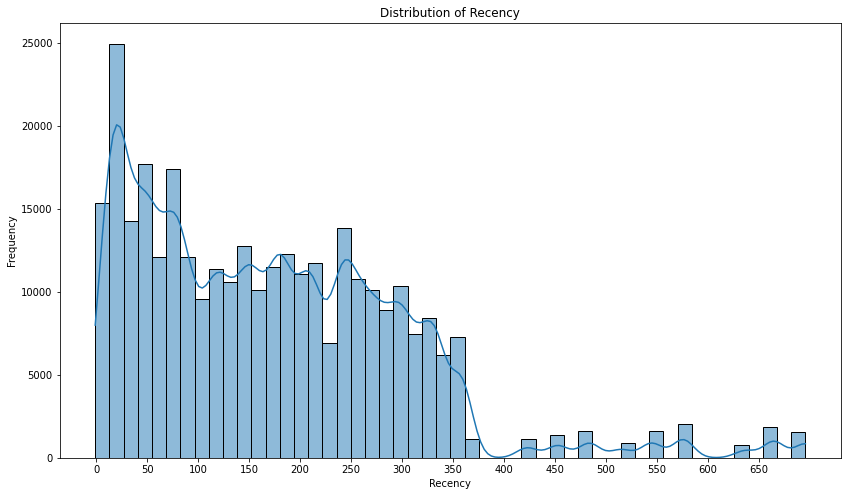

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recency distribution plot
plt.figure(figsize=(14, 8))  # Increase figure size for better visibility

# Recency data
r = RFMScores['Recency']

# Plot the distribution using seaborn's histplot
sns.histplot(r, bins=50, kde=True)

# Set x-axis scale to linear
plt.xscale('linear')

# Set x-axis ticks to an interval of 50
plt.xticks(range(0, max(r) + 1, 50))

# Add labels and title
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Distribution of Recency')

# Show the plot
plt.show()


In [0]:
# Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

Out[32]: count    319323.000000
mean         18.453256
std           0.671889
min          18.000000
25%          18.000000
50%          18.000000
75%          19.000000
max          24.000000
Name: Frequency, dtype: float64

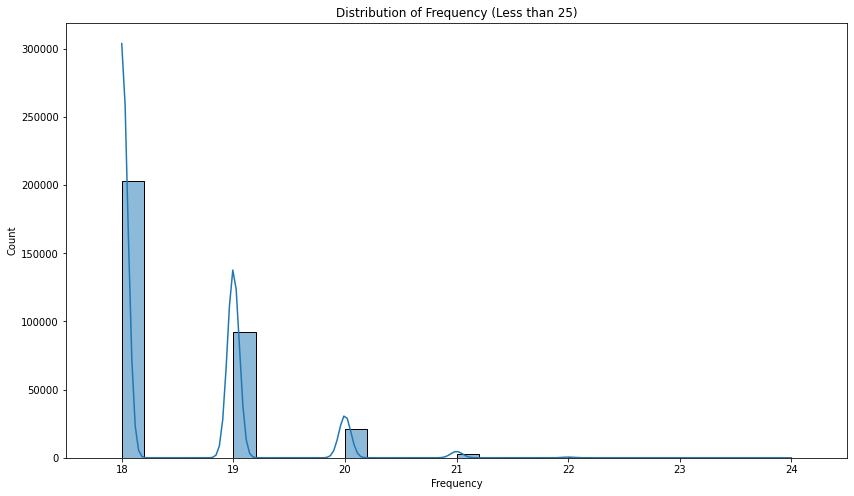

In [0]:
# Query the data for Frequency
f = RFMScores.query('Frequency < 25')['Frequency']  # Given the max is 24, you might want to focus here

# Set figure size
plt.figure(figsize=(14, 8))  # Increase figure size for better visibility

# Plot the distribution using seaborn's histplot
sns.histplot(f, kde=True, bins=30)  # Increase the number of bins for more detail

# Set x-axis limits to focus on the most relevant part of the data
plt.xlim(17.5, 24.5)  # Narrow down to the most populated area

# Set x-axis ticks to intervals of 0.5 for better granularity
plt.xticks(range(18, 25, 1))

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Distribution of Frequency (Less than 25)')

# Show the plot
plt.show()


In [0]:
# Descriptive Statistics (Monetary)
RFMScores.Monetary.describe()

Out[34]: count    3.193230e+05
mean     4.434344e+02
std      8.159079e+03
min     -1.140291e+05
25%      6.250293e+01
50%      2.055436e+02
75%      4.436525e+02
max      3.350008e+06
Name: Monetary, dtype: float64

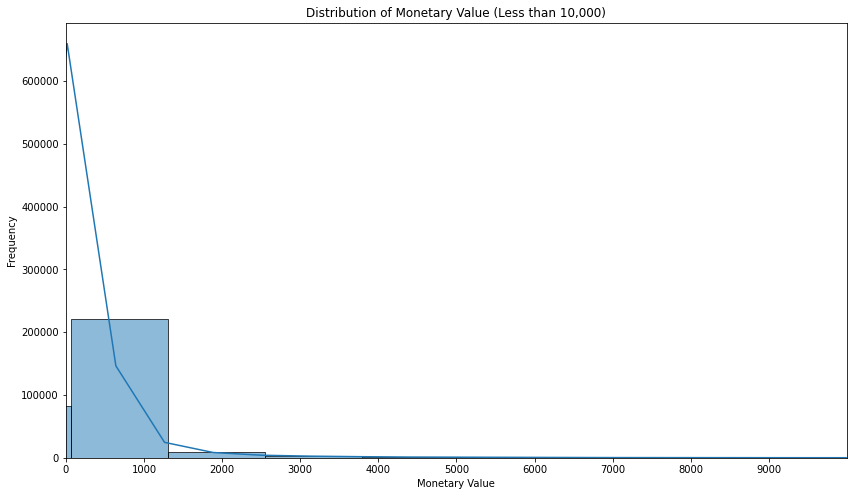

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Query the data for Monetary < 10000
m = RFMScores.query('Monetary < 10000')['Monetary']

# Set figure size
plt.figure(figsize=(14, 8))  # Increase figure size for better visibility

# Plot the distribution using seaborn's histplot
sns.histplot(m, kde=True, bins=100)  # Increase the number of bins for more detail

# Set x-axis limits to focus on the most relevant part of the data
plt.xlim(0, 10000)  # Adjust this as needed to zoom in on the most populated area

# Set x-axis ticks to intervals of 500 or 1000 for better readability
plt.xticks(range(0, 10000, 1000))

# Add labels and title
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')
plt.title('Distribution of Monetary Value (Less than 10,000)')

# Show the plot
plt.show()


In [0]:
# Calculate segments
segments = RFMScores[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.2, 0.4, 0.6, 0.8])
segments = segments.to_dict()

In [0]:
# Functions to create R, F, and M segments
def RScoring(x, p, d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1
    
def FnMScoring(x, p, d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else:
        return 5

In [0]:
# Create R, F, and M segments
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency', segments))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency', segments))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary', segments))

RFMScores.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12353.990284,325,18,1.286841e+06,1,1,5
1,12690.872298,31,19,4.491482e+02,5,4,4
2,12694.656520,28,18,2.363174e+02,5,1,3
3,12695.834433,30,19,6.262581e+02,5,4,5
4,12696.097291,14,20,4.554975e+02,5,5,4


In [0]:
# Combine R, F, and M segments
RFMScores['RFMGroup'] = RFMScores['R'].map(str) + RFMScores['F'].map(str) + RFMScores['M'].map(str)

# Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)

RFMScores.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
0,12353.990284,325,18,1.286841e+06,1,1,5,115,7
1,12690.872298,31,19,4.491482e+02,5,4,4,544,13
2,12694.656520,28,18,2.363174e+02,5,1,3,513,9
3,12695.834433,30,19,6.262581e+02,5,4,5,545,14
4,12696.097291,14,20,4.554975e+02,5,5,4,554,14


In [0]:
# Assign Loyalty Level to each customer

Loyalty_Level = ['Basic', 'Silver', 'Gold', 'Platinum', 'Diamond']
Score_cuts = pd.qcut(RFMScores.RFMScore, q=5, labels=Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values

RFMScores.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12353.990284,325,18,1.286841e+06,1,1,5,115,7,Silver
1,12690.872298,31,19,4.491482e+02,5,4,4,544,13,Diamond
2,12694.656520,28,18,2.363174e+02,5,1,3,513,9,Gold
3,12695.834433,30,19,6.262581e+02,5,4,5,545,14,Diamond
4,12696.097291,14,20,4.554975e+02,5,5,4,554,14,Diamond


In [0]:
# Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
66824,14039.548558,284,18,40.701314,1,1,1,111,3,Basic
255045,17229.493023,300,18,40.694044,1,1,1,111,3,Basic
255418,17234.487880,312,18,40.689890,1,1,1,111,3,Basic
5471,12847.001288,279,18,40.688857,1,1,1,111,3,Basic
209731,16421.403613,341,18,40.685704,1,1,1,111,3,Basic
174779,15750.586166,358,18,40.683164,1,1,1,111,3,Basic
274788,17579.369701,312,18,40.668616,1,1,1,111,3,Basic
306330,18024.885090,301,18,40.639547,1,1,1,111,3,Basic
72831,14092.828918,637,18,40.634521,1,1,1,111,3,Basic
232295,16806.776060,360,18,40.632480,1,1,1,111,3,Basic


In [0]:
# Validate the data for RFMGroup = 555
RFMScores[RFMScores['RFMGroup']=='555'].sort_values('Monetary', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
268387,17456.576019,38,21,79979.779072,5,5,5,555,15,Diamond
268542,17460.066537,38,20,59859.156521,5,5,5,555,15,Diamond
71586,14084.813729,16,20,52897.144245,5,5,5,555,15,Diamond
9838,12943.930817,31,20,16505.791906,5,5,5,555,15,Diamond
267031,17431.910094,38,20,14656.950157,5,5,5,555,15,Diamond
267177,17434.392951,25,20,12575.575031,5,5,5,555,15,Diamond
266765,17427.355644,18,20,11078.963693,5,5,5,555,15,Diamond
9652,12940.702981,36,20,10435.614987,5,5,5,555,15,Diamond
16911,13073.827338,34,21,9980.790405,5,5,5,555,15,Diamond
271610,17520.532777,16,20,9607.051513,5,5,5,555,15,Diamond


In [0]:
RFMScores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319323 entries, 0 to 319322
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   CustomerID         319323 non-null  float64 
 1   Recency            319323 non-null  int64   
 2   Frequency          319323 non-null  int64   
 3   Monetary           319323 non-null  float64 
 4   R                  319323 non-null  int64   
 5   F                  319323 non-null  int64   
 6   M                  319323 non-null  int64   
 7   RFMGroup           319323 non-null  object  
 8   RFMScore           319323 non-null  int64   
 9   RFM_Loyalty_Level  319323 non-null  category
dtypes: category(1), float64(2), int64(6), object(1)
memory usage: 22.2+ MB


In [0]:
# Converting Pandas DF to PySpark DF
RFMScores_spark = spark.createDataFrame(RFMScores)

RFMScores_spark = RFMScores_spark.repartition(1)

In [0]:
# Exporting the file into s3 bucket as a csv format
RFMScores_spark.write.mode('overwrite').option("header", "true").csv('s3://dbda-project/Output_RFM_Modelling')

# K-means Clustering

In [0]:
df = spark.read.csv('s3://dbda-project/Output_RFM_Modelling', inferSchema=True, header=True)
ml_df = df.toPandas()
print(ml_df.shape)
ml_df.head()

(319323, 10)


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12353.990284,325,18,1.286841e+06,1,1,5,115,7,Silver
1,12690.872298,31,19,4.491482e+02,5,4,4,544,13,Diamond
2,12694.656520,28,18,2.363174e+02,5,1,3,513,9,Gold
3,12695.834433,30,19,6.262581e+02,5,4,5,545,14,Diamond
4,12696.097291,14,20,4.554975e+02,5,5,4,554,14,Diamond


In [0]:
ml_df.columns[(ml_df == 0).any()]

Out[59]: Index(['Recency'], dtype='object')

In [0]:
# Handle negative and zero values
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

# Apply function to Recency and Monetary columns
ml_df['Recency'] = ml_df['Recency'].apply(handle_neg_n_zero)
ml_df['Monetary'] = ml_df['Monetary'].apply(handle_neg_n_zero)

# Perform Log transformation
Log_Tfd_Data = ml_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

# Display the transformed data
print(Log_Tfd_Data.head())

   Recency  Frequency  Monetary
0    5.784      2.890    14.068
1    3.434      2.944     6.107
2    3.332      2.890     5.465
3    3.401      2.944     6.440
4    2.639      2.996     6.121


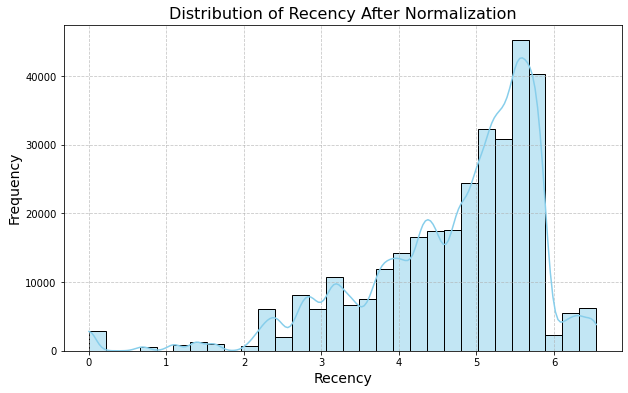

In [0]:
# Plotting the histogram with KDE for Recency
Recency_Plot = Log_Tfd_Data['Recency']

plt.figure(figsize=(10, 6))
sns.histplot(Recency_Plot, kde=True, bins=30, color='skyblue', edgecolor='black')

# Customizing the plot
plt.title('Distribution of Recency After Normalization', fontsize=16)
plt.xlabel('Recency', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

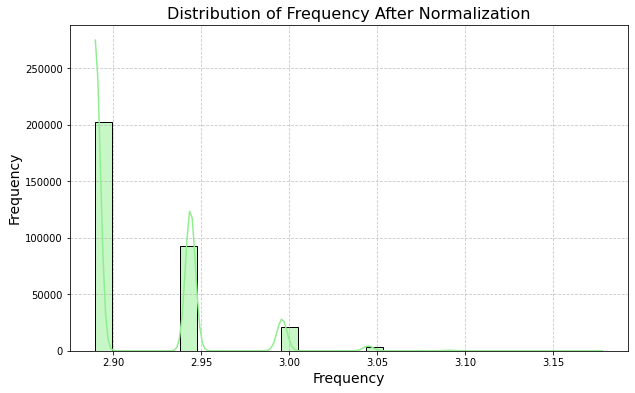

In [0]:
# Filter data for Frequency values less than 1000
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']

plt.figure(figsize=(10, 6))
sns.histplot(Frequency_Plot, kde=True, bins=30, color='lightgreen', edgecolor='black')

# Customizing the plot
plt.title('Distribution of Frequency After Normalization', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

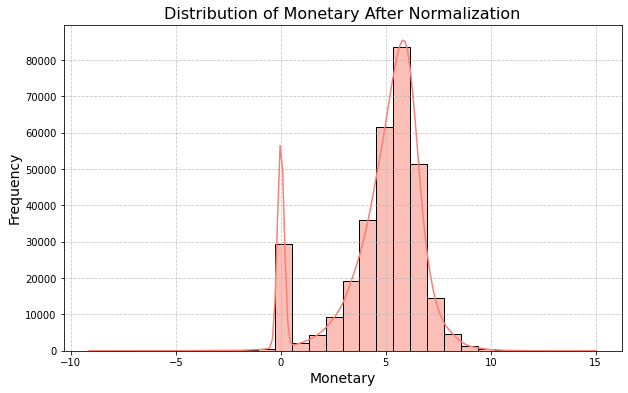

In [0]:
# Filter data for Monetary values less than 10000
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']

plt.figure(figsize=(10, 6))
sns.histplot(Monetary_Plot, kde=True, bins=30, color='salmon', edgecolor='black')

# Customizing the plot
plt.title('Distribution of Monetary After Normalization', fontsize=16)
plt.xlabel('Monetary', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [0]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming Log_Tfd_Data is the DataFrame you want to scale
# Check the shape of Log_Tfd_Data to ensure it matches the number of rows in Scaled_Data
print(Log_Tfd_Data.shape)

# Process the data on the same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

# Transform it back to a DataFrame with the correct index and columns
# Ensure the index used here matches the number of rows in Log_Tfd_Data
Scaled_Data = pd.DataFrame(Scaled_Data, index=Log_Tfd_Data.index, columns=Log_Tfd_Data.columns)

# Display the first few rows of the scaled data
print(Scaled_Data.head())


(319323, 3)
    Recency  Frequency  Monetary
0  0.941959  -0.680884  4.577210
1 -1.136057   0.834766  0.640892
2 -1.226252  -0.680884  0.323455
3 -1.165237   0.834766  0.805544
4 -1.839045   2.294281  0.647815


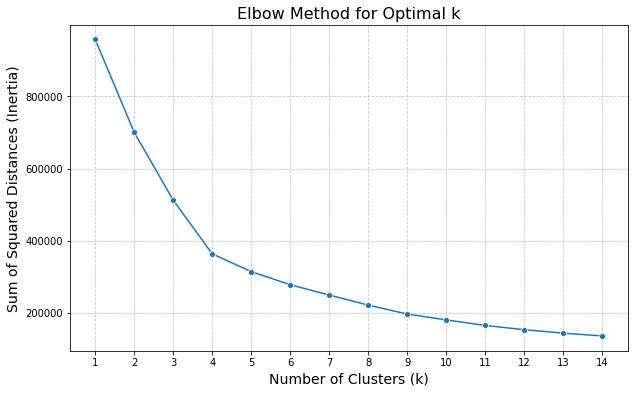

In [0]:
from sklearn.cluster import KMeans

# Dictionary to hold the sum of squared distances (inertia)
sum_of_sq_dist = {}

# Iterate over a range of cluster numbers to fit the KMeans model
for k in range(1, 15):
    km = KMeans(n_clusters=k, max_iter=1000, random_state=0)
    km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()), marker='o')
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Sum of Squared Distances (Inertia)', fontsize=14)
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, 15))  # Ensure x-axis ticks are integer values within the range of k
plt.show()


In [0]:
# Perform K-Means Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters=3, max_iter=1000, random_state=0)
KMean_clust.fit(Scaled_Data)

# Find the clusters for the observations in the dataset
ml_df['Cluster'] = KMean_clust.labels_
ml_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
0,12353.990284,325,18,1.286841e+06,1,1,5,115,7,Silver,2
1,12690.872298,31,19,4.491482e+02,5,4,4,544,13,Diamond,1
2,12694.656520,28,18,2.363174e+02,5,1,3,513,9,Gold,2
3,12695.834433,30,19,6.262581e+02,5,4,5,545,14,Diamond,1
4,12696.097291,14,20,4.554975e+02,5,5,4,554,14,Diamond,1


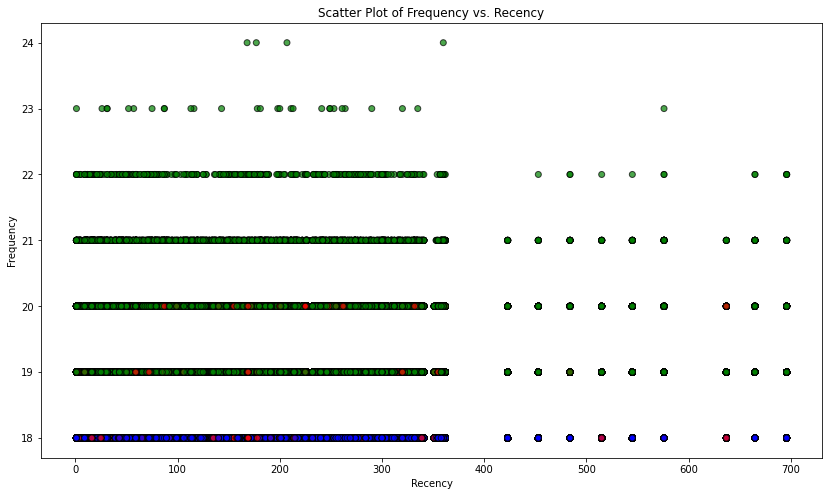

In [0]:
# Define the colors for the clusters
Colors = ["red", "green", "blue"]

# Map cluster labels to colors
ml_df['Color'] = ml_df['Cluster'].map(lambda p: Colors[p])

plt.figure(figsize=(14, 8))
plt.scatter(
    ml_df['Recency'],
    ml_df['Frequency'],
    c=ml_df['Color'],  # Use the mapped colors
    alpha=0.7,  # Set transparency
    edgecolor='k'  # Add edge color for better separation
)
plt.title('Scatter Plot of Frequency vs. Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


In [0]:
ml_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
0,12353.990284,325,18,1.286841e+06,1,1,5,115,7,Silver,2,blue
1,12690.872298,31,19,4.491482e+02,5,4,4,544,13,Diamond,1,green
2,12694.656520,28,18,2.363174e+02,5,1,3,513,9,Gold,2,blue
3,12695.834433,30,19,6.262581e+02,5,4,5,545,14,Diamond,1,green
4,12696.097291,14,20,4.554975e+02,5,5,4,554,14,Diamond,1,green


In [0]:
ml_df_spark = spark.createDataFrame(ml_df)
ml_df_spark = ml_df_spark.repartition(1)

In [0]:
# Save DataFrame to DBFS
# output_path_dbfs = '/dbfs/tmp/Output_KMeans'
# ml_df_spark.write.mode('overwrite').csv(output_path_dbfs)


In [0]:
# Exporting the file into s3 bucket as a csv format
ml_df_spark.write.mode('overwrite').option("header", "true").csv('s3://dbda-project/Output_KMeans')

# SQL Questions

In [0]:
sdf = spark.read.csv('s3://dbda-project/Output_KMeans', inferSchema=True, header=True)
print(sdf.count(), len(sdf.columns))
sdf.show(5)

319323 12
+------------------+-------+---------+------------------+---+---+---+--------+--------+-----------------+-------+-----+
|        CustomerID|Recency|Frequency|          Monetary|  R|  F|  M|RFMGroup|RFMScore|RFM_Loyalty_Level|Cluster|Color|
+------------------+-------+---------+------------------+---+---+---+--------+--------+-----------------+-------+-----+
|12353.990283560168|    325|       18|1286841.4921950535|  1|  1|  5|     115|       7|           Silver|      2| blue|
|12690.872297845577|     31|       19|449.14822529336146|  5|  4|  4|     544|      13|          Diamond|      1|green|
| 12694.65652031647|     28|       18|236.31736689975986|  5|  1|  3|     513|       9|             Gold|      2| blue|
|12695.834432793663|     30|       19| 626.2581477532665|  5|  4|  5|     545|      14|          Diamond|      1|green|
|12696.097290687929|     14|       20| 455.4974637280201|  5|  5|  4|     554|      14|          Diamond|      1|green|
+------------------+-------+--

In [0]:
sdf.printSchema()

root
 |-- CustomerID: double (nullable = true)
 |-- Recency: integer (nullable = true)
 |-- Frequency: integer (nullable = true)
 |-- Monetary: double (nullable = true)
 |-- R: integer (nullable = true)
 |-- F: integer (nullable = true)
 |-- M: integer (nullable = true)
 |-- RFMGroup: integer (nullable = true)
 |-- RFMScore: integer (nullable = true)
 |-- RFM_Loyalty_Level: string (nullable = true)
 |-- Cluster: integer (nullable = true)
 |-- Color: string (nullable = true)



In [0]:
sdf.createOrReplaceTempView("customers")

In [0]:
# MySQL Queries
spark.sql('select * from customers').show(5)

+------------------+-------+---------+------------------+---+---+---+--------+--------+-----------------+-------+-----+
|        CustomerID|Recency|Frequency|          Monetary|  R|  F|  M|RFMGroup|RFMScore|RFM_Loyalty_Level|Cluster|Color|
+------------------+-------+---------+------------------+---+---+---+--------+--------+-----------------+-------+-----+
|12353.990283560168|    325|       18|1286841.4921950535|  1|  1|  5|     115|       7|           Silver|      2| blue|
|12690.872297845577|     31|       19|449.14822529336146|  5|  4|  4|     544|      13|          Diamond|      1|green|
| 12694.65652031647|     28|       18|236.31736689975986|  5|  1|  3|     513|       9|             Gold|      2| blue|
|12695.834432793663|     30|       19| 626.2581477532665|  5|  4|  5|     545|      14|          Diamond|      1|green|
|12696.097290687929|     14|       20| 455.4974637280201|  5|  5|  4|     554|      14|          Diamond|      1|green|
+------------------+-------+---------+--

In [0]:
# How many Distinct customers do we have in our database
spark.sql('select count(distinct CustomerID) as Total_Customers from customers').show()

+---------------+
|Total_Customers|
+---------------+
|         319323|
+---------------+



In [0]:
# What is the Monetary value generated by each customer?
spark.sql('select CustomerID, sum(Monetary) as Monetary_value from customers group by CustomerID').show()

+------------------+------------------+
|        CustomerID|    Monetary_value|
+------------------+------------------+
|12720.050183882875|39.391146384134224|
|12727.555337878624|49.590065898136935|
|12736.832286341494| 72.02716208933823|
| 12736.89180760576| 668.2772288289387|
|12740.509439604748|1234.3817223188692|
|12742.710855500549| 95.00226001535096|
|12743.673162047107|459.35885070054434|
| 12744.95992187632| 61.98071496795429|
|12747.128410088217|299.52745085234784|
|12747.226606560414|110.00298214509206|
|12747.861277846703|  493.444549841567|
| 12749.43036777979|211.94949914749589|
|12757.280908385213|               1.0|
|12757.849525519103| 354.2914443426025|
|12762.289409493398| 350.0694748008471|
| 12763.63765588263| 117.0815555224286|
|12766.290382177664|24.142457183795884|
|12768.979144408799|               1.0|
| 12783.04395965782| 166.0986586838289|
|12783.119439074488| 1060.317972693239|
+------------------+------------------+
only showing top 20 rows



In [0]:
# Who are the top 10% of customers in terms of monetary value?

spark.sql('with customer_revenue as (select CustomerID, sum(Monetary) as total_revenue from customers group by CustomerID ) \
    select CustomerID, total_revenue \
        from (select CustomerID, total_revenue, ntile(10) over(order by total_revenue desc) as percentile from customer_revenue ) as customer_percentiles \
        where percentile = 1').show()


+------------------+------------------+
|        CustomerID|     total_revenue|
+------------------+------------------+
| 16423.04487607688| 3350007.984261182|
|15098.913350278897|2652241.3344560307|
|12353.990283560168|1286841.4921950535|
|15122.087628252824| 682637.1503059261|
|17451.252965284802|158695.56365712004|
|15749.984748964907|138122.42962879635|
|15730.242786296512|136030.04679310234|
|16012.262678321318| 135517.8514037182|
| 18088.10337533734|128195.36863987721|
|12900.556090272286|125510.01776781876|
|15747.360698237002| 99798.56559175835|
| 17437.81280488305| 97293.30642798121|
|15517.267993721562| 94938.52843965527|
|17892.090192958647|  90112.9231840524|
|15757.256103609338| 89412.04927388657|
|16054.523706737462| 89241.59378625051|
| 13291.00710337228| 87034.11558502281|
| 17930.48177385821| 83938.74567556355|
|15197.399533807542| 82033.82667233667|
|17947.975774700422| 80453.49014702227|
+------------------+------------------+
only showing top 20 rows



In [0]:
# Who are the Top 10% of customers in terms of RFM Score ?

spark.sql('with customer_revenue as (select CustomerID, sum(RFMScore) as RFM_Score from customers group by CustomerID ) \
    select CustomerID, RFM_Score from ( select CustomerID, RFM_Score, NTILE(10) over(order by RFM_Score asc) as percentile from customer_revenue ) as customer_percentiles where percentile = 1').show()


+------------------+---------+
|        CustomerID|RFM_Score|
+------------------+---------+
|13078.048635658637|        3|
|13258.562647178787|        3|
|13415.737109620355|        3|
| 13282.03548503831|        3|
|13760.800718653954|        3|
|13761.923180924798|        3|
| 13544.73896776143|        3|
| 12791.56836488793|        3|
|13129.586213381368|        3|
|13261.714775494882|        3|
|13265.134438575093|        3|
|13290.313243268796|        3|
|12987.087539199463|        3|
|13268.924082861444|        3|
|13432.094798137432|        3|
| 13708.32943347819|        3|
|12854.609495744697|        3|
| 12863.64230411757|        3|
|12871.258082090382|        3|
| 13038.05448508706|        3|
+------------------+---------+
only showing top 20 rows



In [0]:
# Who are the Least 10% of customers in terms of RFM Score ?

spark.sql('with customer_revenue AS (select CustomerID, SUM(RFMScore) as RFM_Score from customers group by CustomerID ) \
    select CustomerID, RFM_Score from ( select CustomerID, RFM_Score, NTILE(10) over(order by RFM_Score desc) as percentile from customer_revenue ) as customer_percentiles where percentile = 1').show()


+------------------+---------+
|        CustomerID|RFM_Score|
+------------------+---------+
|13084.256980356673|       15|
|13154.046809876296|       15|
| 13611.15302438554|       15|
|13667.801124015792|       15|
|13684.271819846543|       15|
|12858.293951146607|       15|
|13379.235388769728|       15|
|13136.332213083642|       15|
| 13143.78399211161|       15|
| 13115.95677008153|       15|
|13925.552518657427|       15|
|12913.168346758443|       15|
|13340.050005823881|       15|
|13000.009756613646|       15|
|13409.866751257832|       15|
|13107.120959814592|       15|
|13555.233260786174|       15|
| 13874.41809688955|       15|
|12726.685090497303|       15|
| 13054.05852539398|       15|
+------------------+---------+
only showing top 20 rows



In [0]:
# Identify the top 10 customers with an RFM score of 555:
spark.sql('select * from customers where R=5 and F=5 and M=5 order by RFMScore limit 10').show()

+------------------+-------+---------+------------------+---+---+---+--------+--------+-----------------+-------+-----+
|        CustomerID|Recency|Frequency|          Monetary|  R|  F|  M|RFMGroup|RFMScore|RFM_Loyalty_Level|Cluster|Color|
+------------------+-------+---------+------------------+---+---+---+--------+--------+-----------------+-------+-----+
|18045.078841291423|     39|       20|  903.279055813953|  5|  5|  5|     555|      15|          Diamond|      1|green|
|12712.370517633628|     22|       20|1224.3341040866424|  5|  5|  5|     555|      15|          Diamond|      1|green|
|17023.517182630403|     46|       20| 1324.776472075524|  5|  5|  5|     555|      15|          Diamond|      1|green|
|12714.438706700052|     23|       20|1317.3027141360935|  5|  5|  5|     555|      15|          Diamond|      1|green|
|13928.217164571079|     22|       20| 531.4072295357125|  5|  5|  5|     555|      15|          Diamond|      1|green|
|12724.405757258199|      4|       20|10

In [0]:
# Count the number of customers in each RFM Segment :
spark.sql('select concat(R, F, M) as rfm_segment, count(*) as customer_count from customers group by rfm_segment order by rfm_segment desc').show()

+-----------+--------------+
|rfm_segment|customer_count|
+-----------+--------------+
|        555|           991|
|        554|           939|
|        553|           936|
|        552|           996|
|        551|          1014|
|        545|          3548|
|        544|          3537|
|        543|          3729|
|        542|          4013|
|        541|          3980|
|        515|          7204|
|        514|          7566|
|        513|          8253|
|        512|          9082|
|        511|          9077|
|        455|          1073|
|        454|          1059|
|        453|           897|
|        452|           846|
|        451|           850|
+-----------+--------------+
only showing top 20 rows

